# Dataset

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import  seaborn as sns
sns.set()

In [78]:
DATA_PATH = "/mnt/hdmenezess42/GitProjects/MLCourseAI/data/"
data = pd.read_csv(f"{DATA_PATH}telecom_churn.csv")

In [79]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

| Name                    | Description                              | Value Type           | Statistical Type        |
|-------------------------|------------------------------------------|----------------------|--------------------------|
| State                   | State abbreviation (like KS = Kansas)    | String               | Categorical              |
| Account length          | How long the client has been with the company | Numerical        | Quantitative             |
| Area code               | Phone number prefix                       | Numerical            | Categorical              |
| International plan      | International plan (on/off)              | String (“Yes”/”No”)  | Categorical/Binary       |
| Voice mail plan         | Voicemail (on/off)                       | String (“Yes”/”No”)  | Categorical/Binary       |
| Number vmail messages   | Number of voicemail messages             | Numerical            | Quantitative             |
| Total day minutes       | Total duration of daytime calls          | Numerical            | Quantitative             |
| Total day calls         | Total number of daytime calls            | Numerical            | Quantitative             |
| Total day charge        | Total charge for daytime services        | Numerical            | Quantitative             |
| Total eve minutes       | Total duration of evening calls          | Numerical            | Quantitative             |
| Total eve calls         | Total number of evening calls            | Numerical            | Quantitative             |
| Total eve charge        | Total charge for evening services        | Numerical            | Quantitative             |
| Total night minutes     | Total duration of night-time calls       | Numerical            | Quantitative             |
| Total night calls       | Total number of night-time calls         | Numerical            | Quantitative             |
| Total night charge      | Total charge for night-time services     | Numerical            | Quantitative             |
| Total intl minutes      | Total duration of international calls    | Numerical            | Quantitative             |
| Total intl calls        | Total number of international calls      | Numerical            | Quantitative             |
| Total intl charge       | Total charge for international calls     | Numerical            | Quantitative             |
| Customer service calls  | Number of calls to customer service      | Numerical            | Categorical/Ordinal      |


The churn column is the target variable.
True for losted customer
False for retained customer

# Univariate Visualization
- Looks at one feature at a time
- Usually mostly interested in the distribution of its values and ignore other features in the dataset


## Quantitative features

### Histograms and density_plots

- The easiest way to take a look at the distribution of a numerical variable is to use the `hist()` method of the `DataFrame`

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

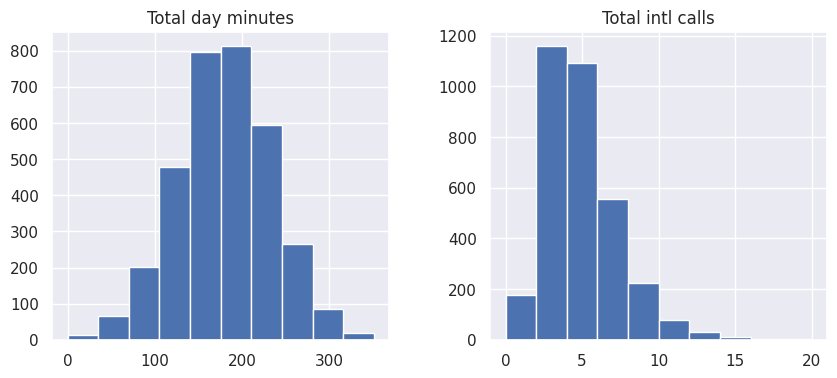

In [80]:
features = ["Total day minutes", "Total intl calls"]
data[features].hist(figsize=(10, 4))

- Knowing the distribution of the feature values becomes essential when you use Machine Learning methods that assume a particular type (most often Gaussian)

- We aslo have the **Kernel Density Plots**.
- Conidered a smoothed version of the histogram.
- Advantage over hist is that they do not depend on the size of the bins.

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

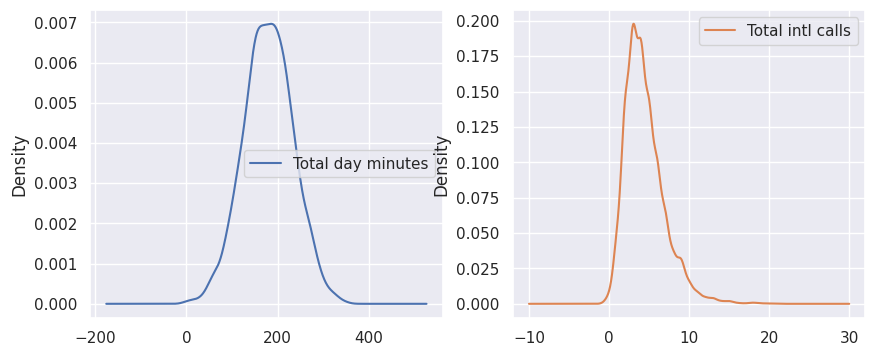

In [81]:
data[features].plot(kind='density', subplots=True, layout=(1,2), sharex=False, figsize=(10, 4))

- Seaborn has a similar method `histplot()`.
- Let's look at the distribution of **Total day minutes** and plot the **Kernel Density Estimate** on top

<Axes: xlabel='Total day minutes', ylabel='Density'>

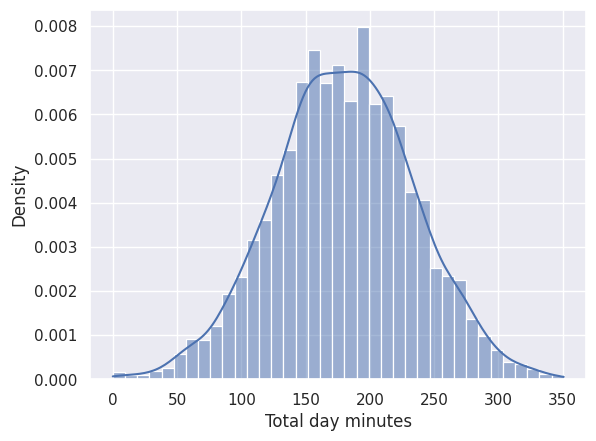

In [82]:
sns.histplot(data['Total day minutes'], kde=True, stat="density")

- Let's look at the distribution of **Total intl calls** and plot the **Kernel Density Estimate** on top

<Axes: xlabel='Total intl calls', ylabel='Density'>

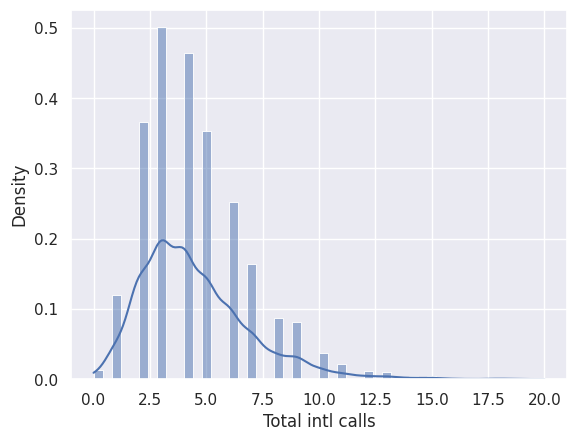

In [83]:
sns.histplot(data['Total intl calls'], kde=True, stat="density")

The height of the histogram bars here is normed and shows the density rather than the number of examples in each bin

### Box plot

<Axes: xlabel='Total intl calls'>

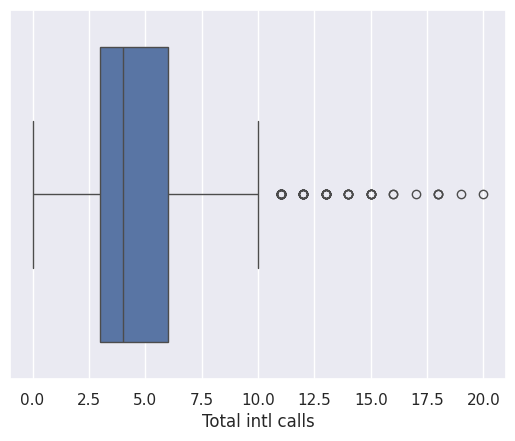

In [84]:
sns.boxplot(x="Total intl calls", data=data)

#### How to interpret:
- Its components are:
    - The box
    - THe so-called whiskers
    - A number of individual points

- The box by itself ilustrates the interquantile spread of the distribution
    - Its length is determined by the $25^{th}(Q1)$ and $75^{th}(Q3)$ percentiles
    - The vertical line inside the box marks the 50% of the distribution

- The whiskers are the lines extending from the box. They represent the entire scatter of data points
    - Specifically the points that fall within the interval $(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)$.
    - $IQR = Q3 - Q1$ == interquartile range

- Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points alogn the central axis

### Violing plot

- look at the figures below. The left is the boxplot and the right is the violin plot with the kernel density estimate on both sides

<Axes: ylabel='Total intl calls'>

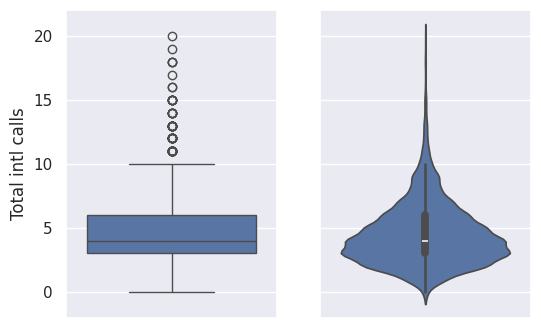

In [85]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=data["Total intl calls"], ax=axes[0])
sns.violinplot(data=data["Total intl calls"], ax=axes[1])

- Combines the structure of a boxplot with a (K)ernel (D)ensity (E)stimate of data -- that is, it displays a smoothed version of the PDF
    - The width of the violin at each vertical point represents the relative density of the data at that value
    - The median and quartiles often still appear overlapping

### Describe()
- DataFrame method to inform relevant information

In [86]:
data[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

## Categorical and binary features

- Take on a fixed number of values
- Each of these values assigns an observation to a corresponding group, known as a category
- Reflects some qualitative property of this example

- Binary variables are an important special case of **categorical variables** when the number of possible values is exactly 2.
    - If the values of a categorical variable are ordered, it is called ordinal

### Frequency table

In [87]:
data['Churn'].value_counts()
# Default sorted from the most to the least frequently occurring values

Churn
False    2850
True      483
Name: count, dtype: int64

### Bar plot

- A graphical representation of the frequence table
- We can create this using the `seaborn` function **countplot()**

<Axes: xlabel='Customer service calls', ylabel='count'>

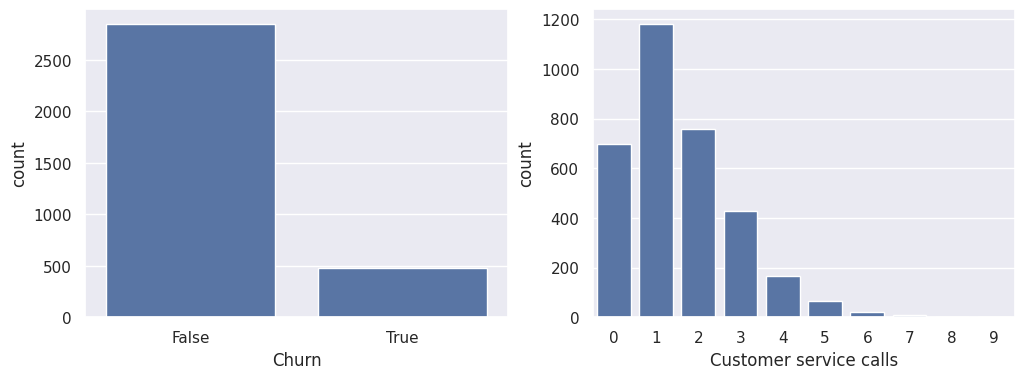

In [88]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=data, ax=axes[0])
sns.countplot(x='Customer service calls', data=data, ax=axes[1])

> While the hist and the bar plot may look smiliar, there are several differences between then:
1. Histograms are best suited for look at the distribution of numerical variables, while bar plost are used for categorical features

2. The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axies: numbers, strings, booleans.

3. The histogram's X-axis is a Cartesian coordinate axis along which values cannot be changed; The ordering of the bars is not predefined. Still, it is useful to note that the bars are often sorted by height, that is, the frequency of the values. Also, when we consider ordinal variables (like Custmer service calls in our data), the bars are usually ordered by variables value

- The left chart illustrates the imbalance in our target variable.
- Th ebar plot fo Customer services calls on the right gives a hint that majority of customers resolve their problems in maximum 2-3 calls.

## Multivariate visualization

- Allow to see relationships between two and more different variables
- The specific type of visualization will depend on the type of the variables being analyzed

### Quantitative vs. Quantitative

#### Correlation Matrix

- Correlations among the numerical variables in dataset
- Important to know as there are ML algorithms (like linear and logistic regression) that do not handle highly correlated input variables well

- First, the method `corr()` on a `DataFrame`calculates the correlation between each pair of features
- Then pass the resulting correlation matrix to `heatmap()` from `seaborn`

<Axes: >

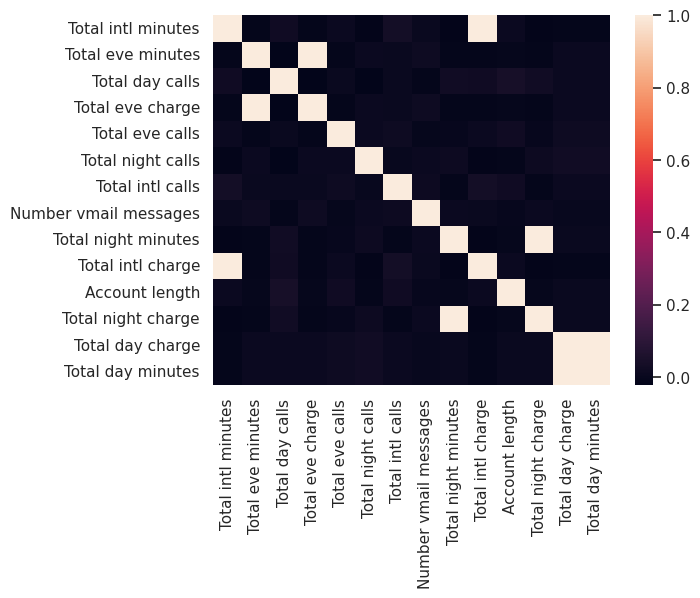

In [89]:
# Drop non-numerical variables
numerical = list(
    set(data.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)

- We can see that there are 4 variables such as *Total day charge* that have been calculated directly from the numbeer of minutes spent on phone calls
- These can be left out because there are dependent `dependent variables` and not contribute any additional information.

In [90]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

#### Scatter Plot

- Display values of two numerical variables as Cartesian coordinates in 2D space
- It is also possible in 3D

- `scatter()` from the function `matplotlib`

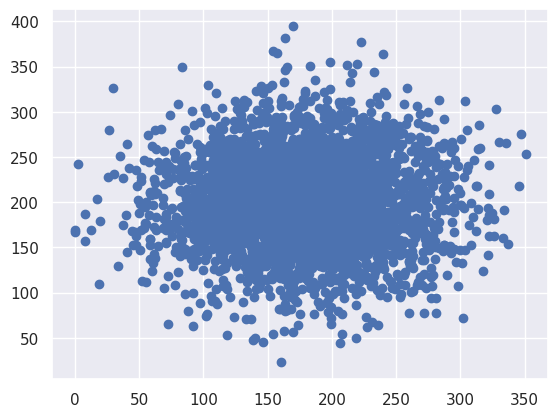

In [91]:
plt.scatter(data["Total day minutes"], data["Total night minutes"])

We can observe that the variables appear to be uncorrelated, as the points are widely scattered in the plot with no clear pattern or trend.

- There is a option to create a scatter plto with `seaborn`:

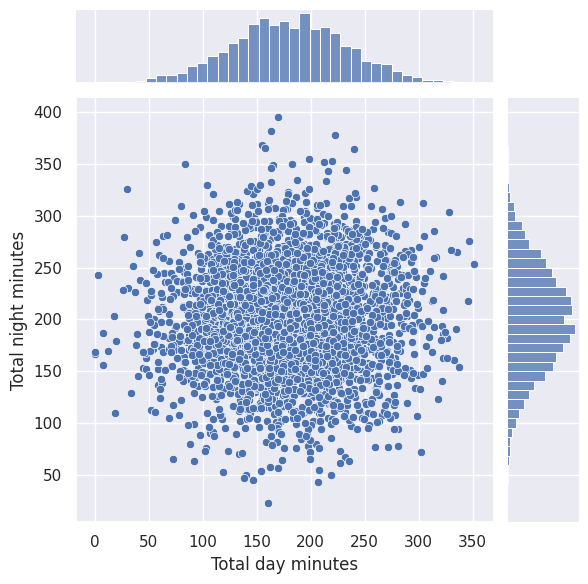

In [92]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=data, kind="scatter")

- Using the same function, we can also get a smoothed version of our bivariate distribution:

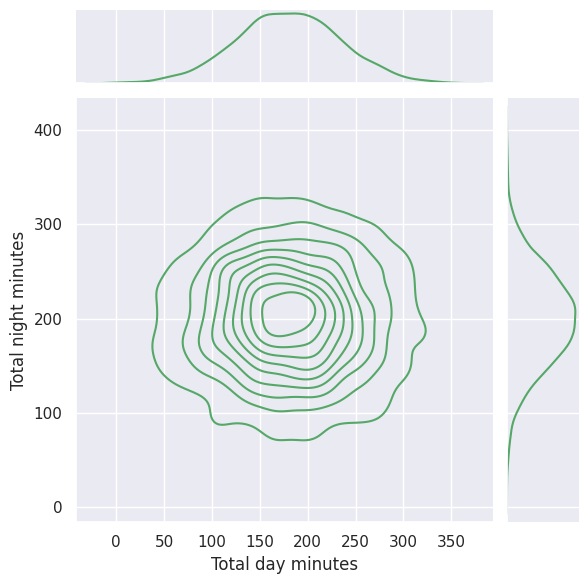

In [93]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=data, kind="kde", color="g")

This is basically a bivariate version of the Kernel Density plot discussed earlier

#### Scatterplot Matrix

In some cases, we may want to plot a scatterplot matrix.

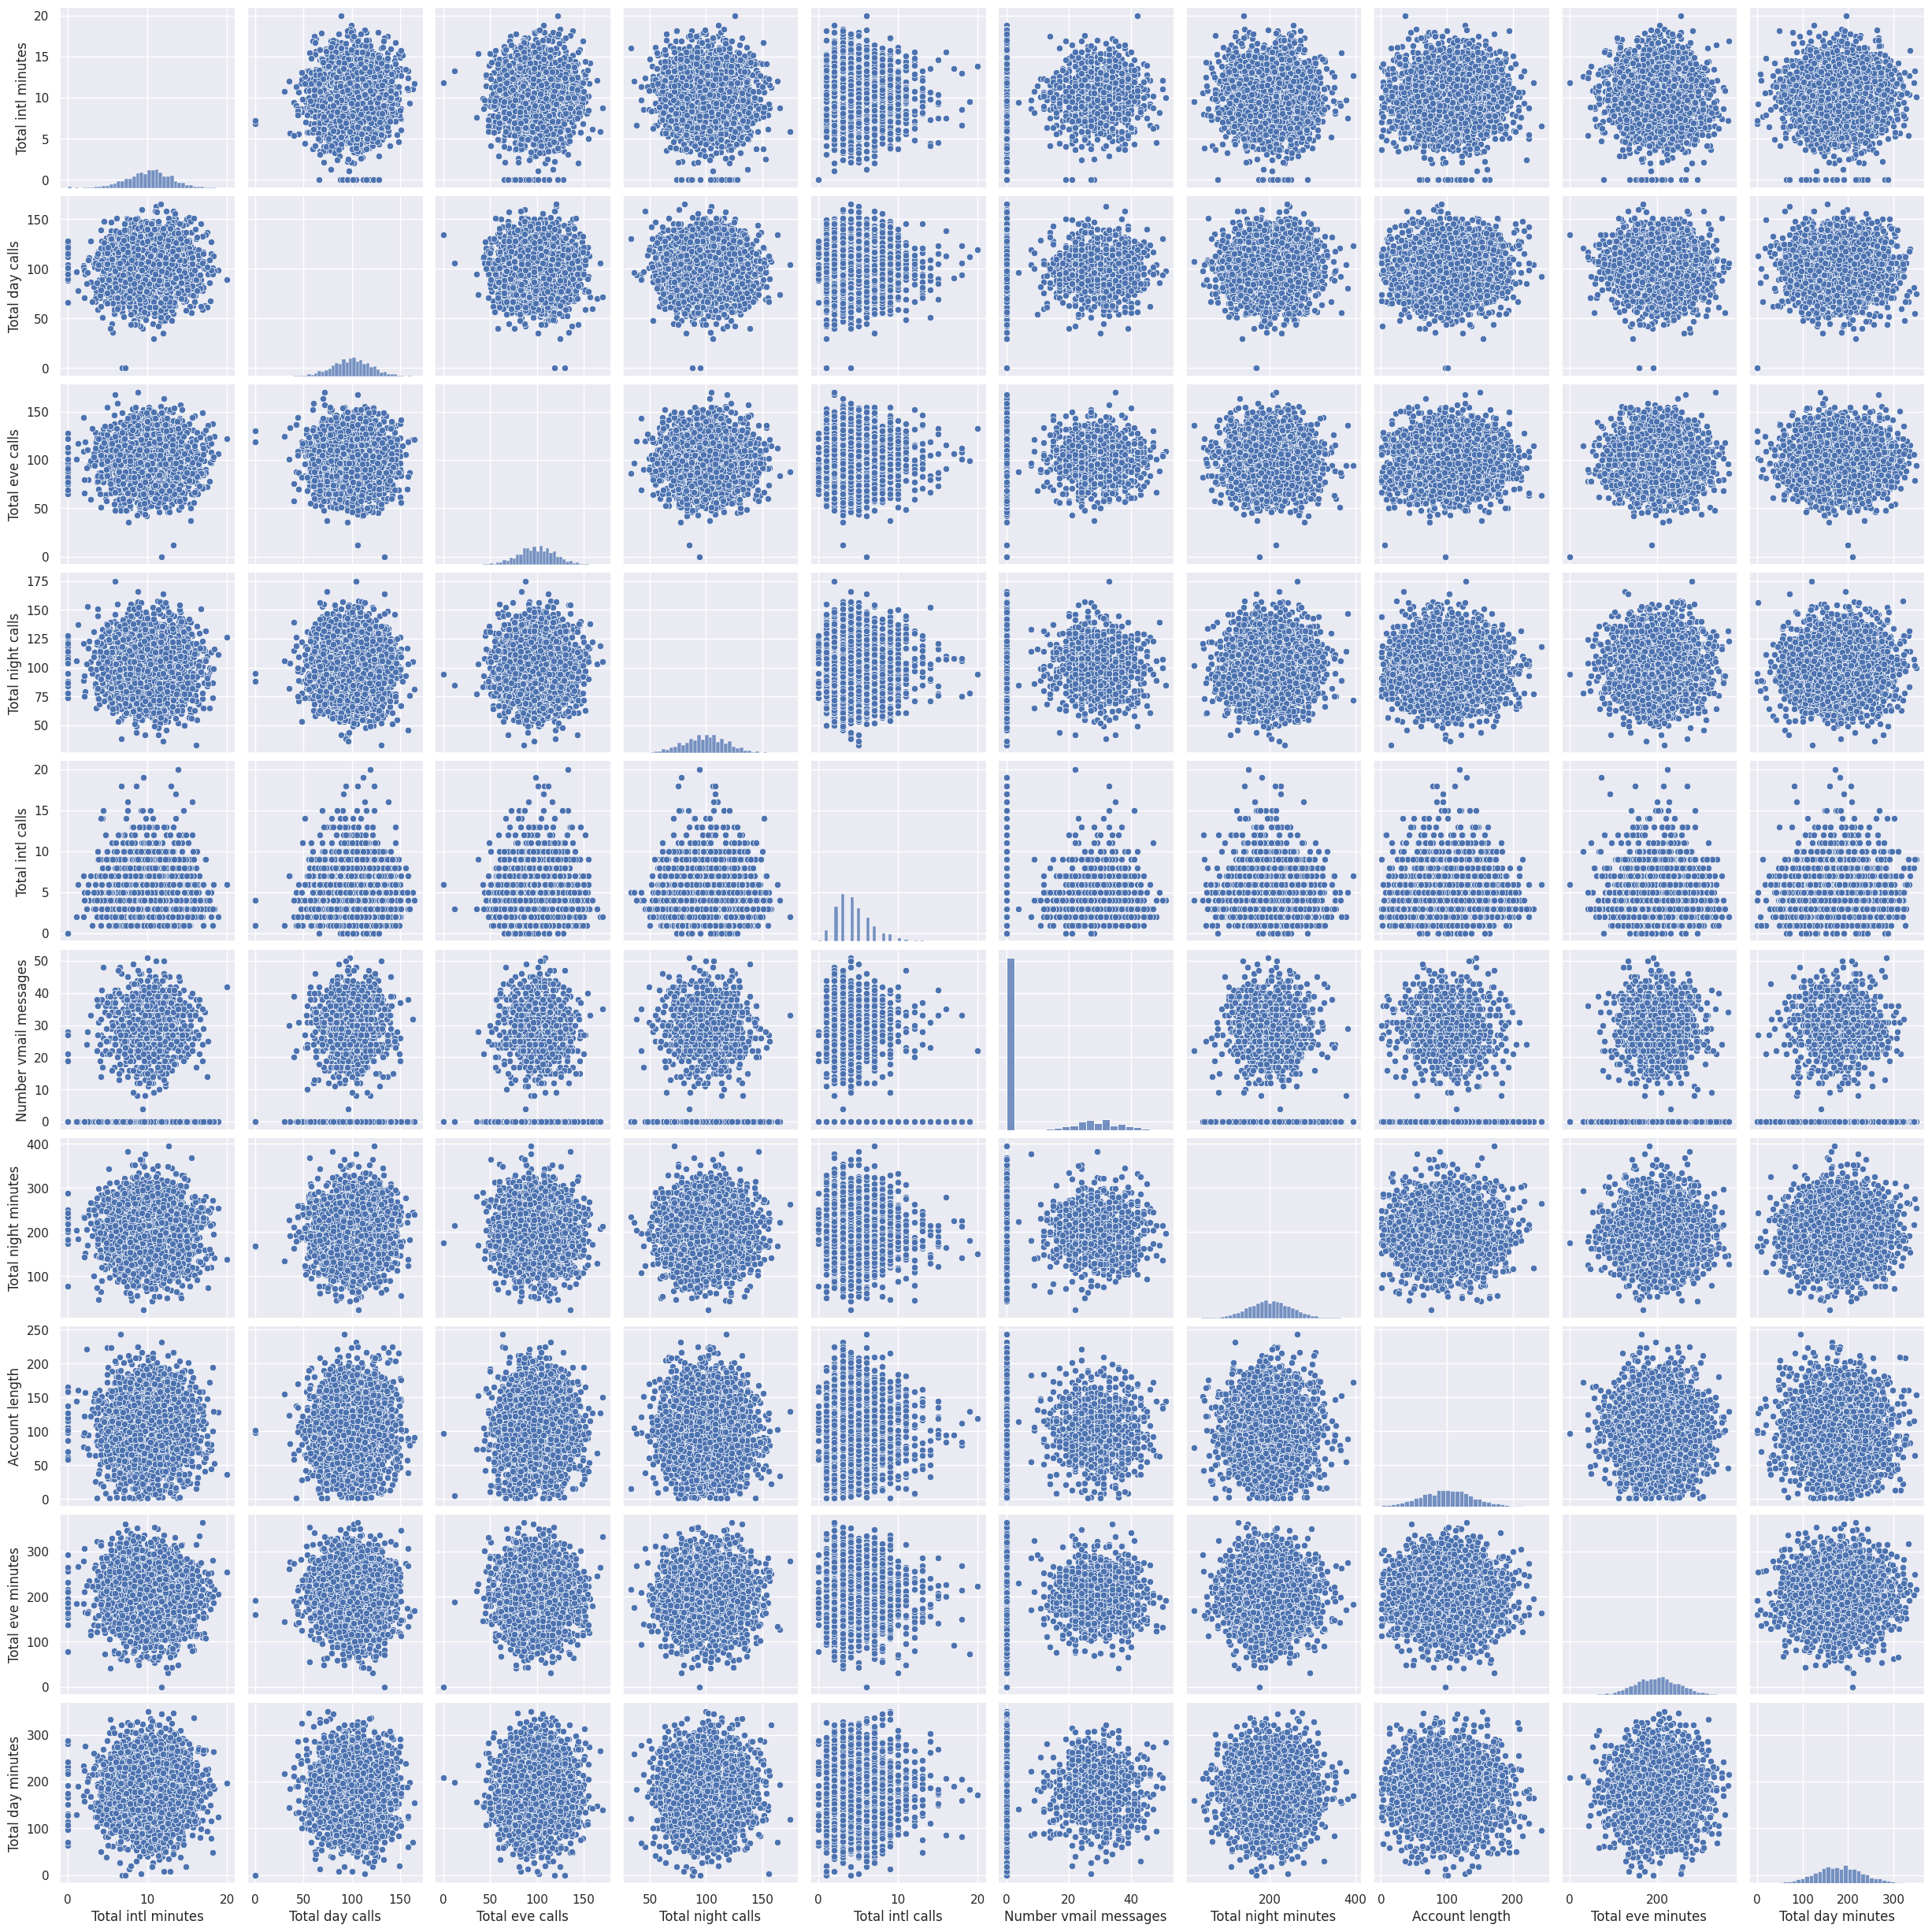

In [94]:
sns.pairplot(data[numerical])

> Sometimes, such a visualization may help draw conclusions about data. But, in this case, everything is pretty clear with no surprises

### Quantitative vs. Categorical

- Let's see how the input variables are related to the target variable Churn

- Scatter plots, their points ca be color- or size-coded so that the values of third categorical variable are also presented in the same figure.
- We can achive this with the `scatter()` function. But let's try `lmplot()` and use the parameter `hue` to indicate our categorical feature of interest

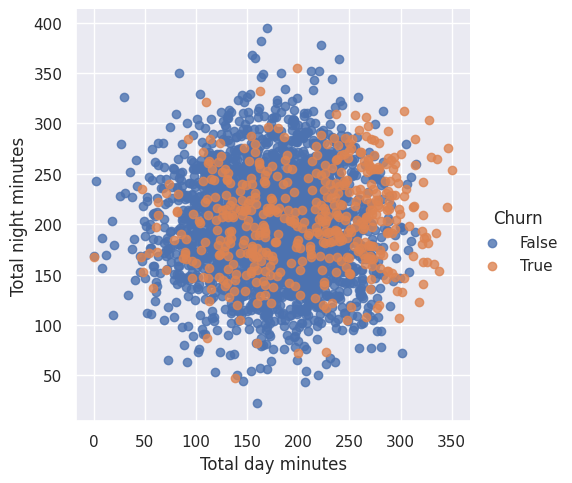

In [95]:
sns.lmplot(
    x="Total day minutes", y="Total night minutes", data=data, hue="Churn", fit_reg=False
)

- It seems that our small proportion of disloyal customers lean towards the top-right corner
- That means that `Churn=True` correlates with `Total night minutes` and `Total day minutes`. That is, they tend to spend more time on the phone during both the day and night.
- But this is not absolutely clear, and we can't jump to conclusion form one chart

- Nowe I create box plots to visualize the distribution statistics of the numerical variables in two disjoint groups: The loyal customers (`Churn=False`) and those who left (`Churn=True`)

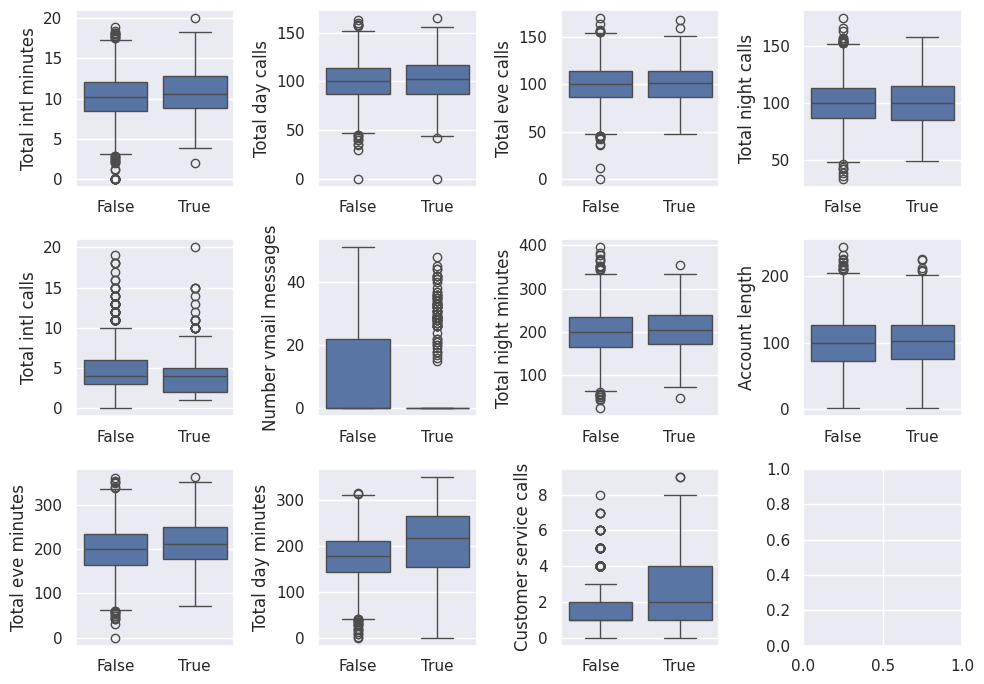

In [96]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=data, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

- From this chart, we can see that the greatest discrepancy in distribution between the two groups is for three variables: **Total day minutes**, **Customer service calls**, **Number vmail messages**.

- Let's look at the distribution of day minutes spoken for the loyal and disloyal customers separately. We will create box and violin plots for **Total day minutes** grouped by the target variable

<Axes: xlabel='Churn', ylabel='Total day minutes'>

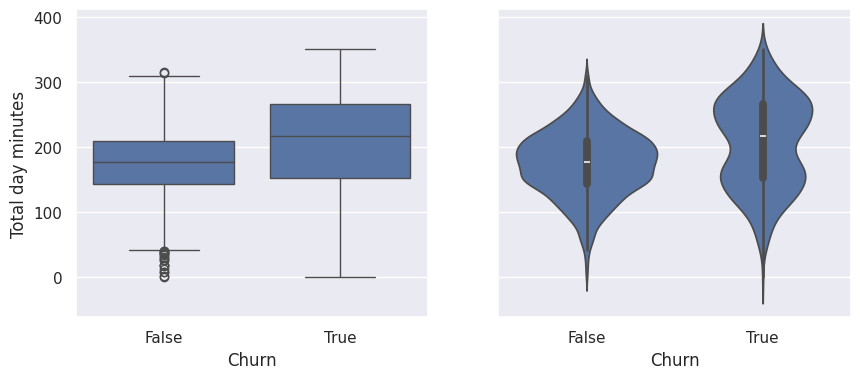

In [97]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=data, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=data, ax=axes[1])

- In this case, the violin plto does not contribute any additional information about our data as everthing is celar from the boxplot alone
- Disloyal customers tend to talk on the phone more

**Observation**:
- Chustomers that discontinue their contracts are more active users of communication services. Perhaps they are unhappy with the tariffs, so a possible measure to prevent churn could be a reduction in call rate
- The company will need to undertake additional economic analysis to find out whether such measures would be beneficial

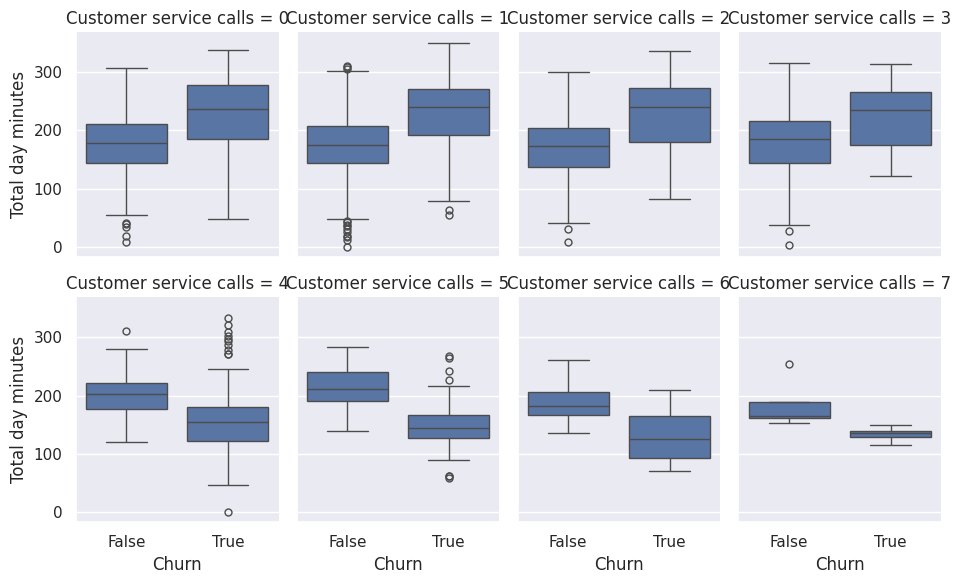

In [98]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=data[data["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
)

- We could conclude that with four calls, Total day minutes may no longer be the main factor for customer churn. Perhaps, in addition to our previous guess about the tariffs, there are customers that are dissatisfied with the service due to other problems.

### Categorical vs. Categorical

- Let's look at the distribution of the number of calls to customer service, again using a count plot. This time, let's pass the parameter `hue=Churn` that adds a categorical dimension to the plot:

<Axes: xlabel='Customer service calls', ylabel='count'>

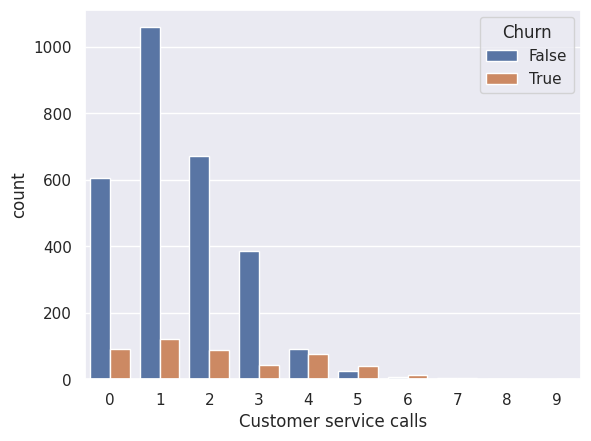

In [99]:
sns.countplot(x="Customer service calls", hue="Churn", data=data)

- The churn rate increases significantly after 4 or more calls to customer service

- Let's lok at the relationship between Churn and the binary features, **International plan** and **Voice mail plan**

<Axes: xlabel='Voice mail plan', ylabel='count'>

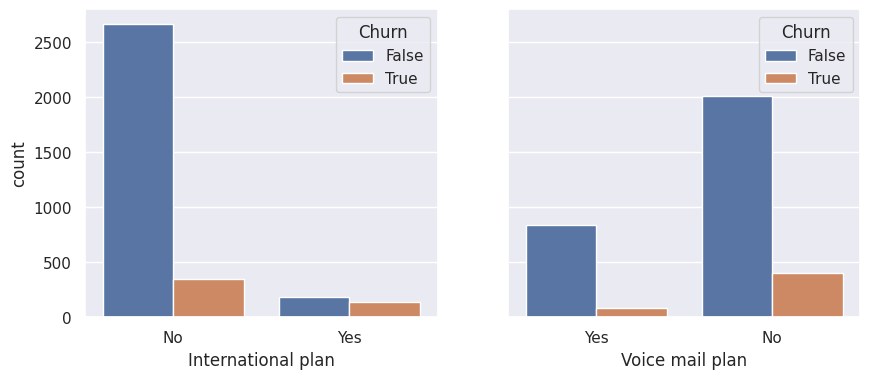

In [100]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x="International plan", hue="Churn", data=data, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=data, ax=axes[1])

- When **International Plan** is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with Voice mail plan

#### Contingency table

- Traditional tool from statiscis
- Also called a cross tabulation
- It shows a multivariate frequency distribution of categorical variables in tabluar form

- It allows us to see the distribution of one variable condition on the other by looking along a column or row

Let's try to see how Churn is related to the categorical variable State

In [101]:
pd.crosstab(data['State'], data['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

- Let's calculate the churn rate for each state, sorting it from high to low:

In [102]:
data.groupby(["State"])["Churn"].agg(["mean"]).sort_values(by="mean", ascending=False).T

State        CA        NJ    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        WA        NV        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

## Whole dataset visualizations

### A naive approach

We have been looking at different facets of our dataset by guessing interesting features and selecting a small number of them at a time for visualization. We have only dealt with two to three variables at once and were easily able to observe the structure and relationships in the data. But what if we want to display all the features and still be able to interpret the resulting visualization?

We could use hist() or create a scatterplot matrix with pairplot() for the whole dataset to look at all of our features simultaneously. But, when the number of features is high enough, this kind of visual analysis quickly becomes slow and inefficient. Besides, we would still be analyzing our variables in a pairwise fashion, not all at once.

### Dimensionality Reduction

- To look at a dataset as a whole, we need to decrease the number of dimensions used in visualization without losing much information about the data.
- This task is called dimensionality reduction.
    - Is an example of an unsupervised learning problem because we need to derive new, low-dimensional feateures from the data itself, without any supervised input

- One of the well-known dimensionality reduction methods is the PCA (Principal Component Analysis).
    - Its limitation is that it is a linear algorithm that implies certain restricitons on the data

- There are also many non-linear methods
- Collectively called Manifold Learning
- One of the best-known of them is t-SNE

### t-SNE

- t-Distributed Stochastic Neighbor Embedding
- Basic idea:
    - find a projection for a high-dimensional feature space onto a plane (or a 3D Hyperplane, but it is almost always 2D). Such that those points that were far apart in the initial n-dimensional space will end up far apart on the plane. Those that were originally close would remain close to each other

In [103]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

We will levae out the State and Churn features and convert the value "Yes/No" of the binary features into numerical values using `pandas.Series.map()`

In [104]:
X = data.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

Now we have to normalize the data. All this can be done with `StandardScaler`

In [105]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, let's build a t-SNE representation:

In [106]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 24.4 s, sys: 22.3 ms, total: 24.4 s
Wall time: 4.24 s


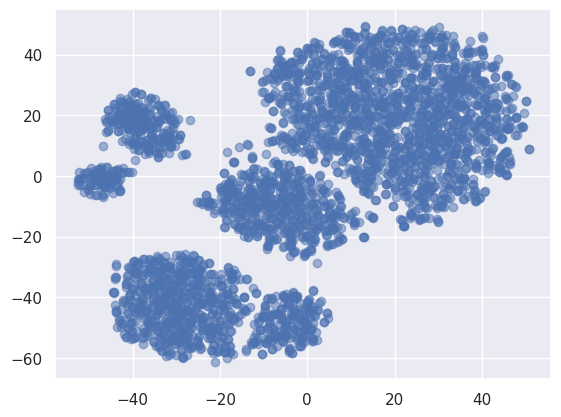

In [107]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5)

Coloring the t-SNE representation according to the churn (blue=loyal, orange=Churned)

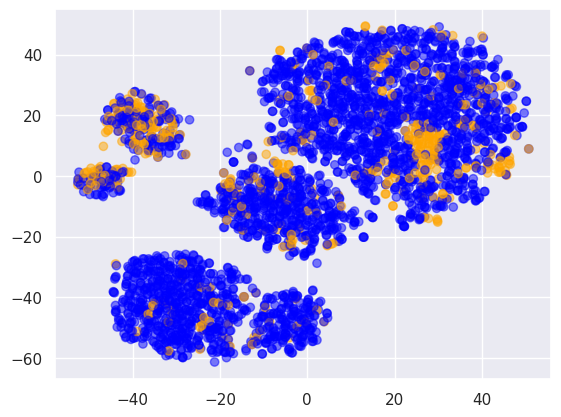

In [108]:
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=data["Churn"].map({False:"blue", True:"orange"}),
    alpha=0.5,
)

We can see that customers who churned are concentrated in a few areas of the lower dimensional feature space

- To better understand the picture, we can also color it with the remaining binary features:
    - International plan and Voicemail
    - Orange dots here indicate instances that are positive for the corresponding binary feature

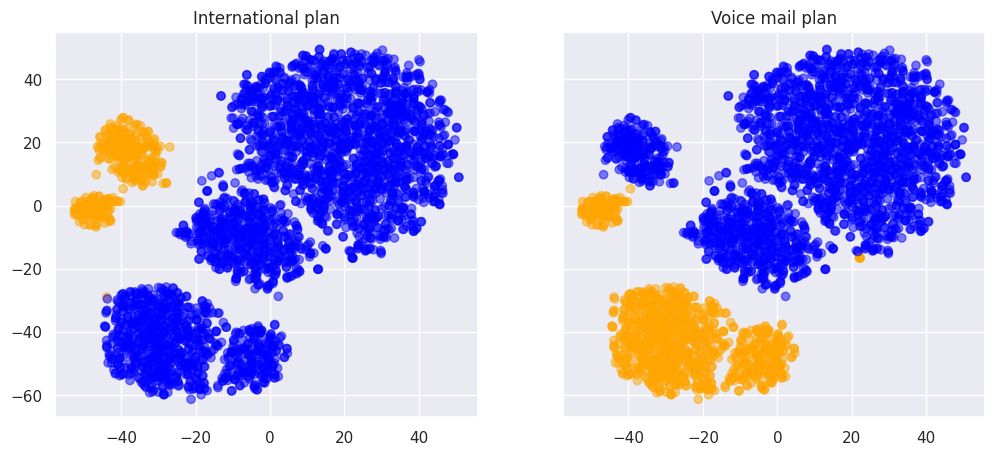

In [109]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))
for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=data[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name)

Now it is clear that, for example, many dissatisfied customers who canceled their subscripitons are crowded together in one cluster, representing the people with the international plan but no voice mail

- Some t-SNE disadvantages:
   - High computational complexity. The implementation in scikit-learn is unlikely to be feasible in a real task. If you have a large number of samples, you should try Multicore-TSNE instead.

   - The plot can change a great deal depending on the random seed, which complicates interpretation. Here is a good tutorial on t-SNE. In general, you shouldn’t make any far-reaching conclusions based on such graphs because it can equate to plain guessing. Of course, some findings in t-SNE pictures can inspire an idea and be confirmed through more thorough research down the line, but that does not happen very often.
